In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.colors as mcolors

import cartopy.crs as ccrs # for projection
import cartopy.feature as cfeature # for map features 
from cartopy.util import add_cyclic_point

### Data: monthly average temperature at surface and many heights (pressure levels) above surface, for many locations from the NCAR Reanalysis, just like we used in your lab exercises last week!

### Information:
https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.html
, 
###  I created a single year subset for downloading convenience in lab, the year 2022, but this dataset spans many years in reality!

In [2]:
data = xr.open_dataset('air.mon.mean.forlab.nc')
print(data)

<xarray.Dataset> Size: 9MB
Dimensions:  (level: 17, lat: 73, lon: 144, time: 12)
Coordinates:
  * level    (level) float32 68B 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 96B 2022-01-01 2022-02-01 ... 2022-12-01
Data variables:
    air      (time, level, lat, lon) float32 9MB ...
Attributes:
    description:     Data from NCEP initialized reanalysis (4x/day).  These a...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Mon Jul  5 21:45:36 1999: ncrcat air.mon.mean.nc /Dataset...
    title:          monthly mean air from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...


In [3]:
temperature = data['air'].values
lon = data['lon'].values
lat = data['lat'].values
level =data['level'].values
time = data['time']

print(np.shape(lon))
print(np.shape(lat))
print(np.shape(level))

type(temperature) # prove that numpy array, indeed

(144,)
(73,)
(17,)


numpy.ndarray

## YOU FIGURED THIS OUT LAST WEEK

In [4]:
# What are the dimensions of your data, and in what order?  CRITICAL!
#  Dimensions, in correct order:    

np.shape(temperature)

# time, levels,lat , lon 
# this is monthly data for 1 year, so 12 times (we could have alternatively pulled and printed out the time variable!)
# level is of length 17
# lat is of length 73
# lon is of length 144

(12, 17, 73, 144)

# YOUR TURN
## (a) Evaluate - how many lcoations exceeded a 90 deg F average monthly surface temperature in July?
## (b) What percent of total locations in July is that?

In [20]:
thresh = 32.22 # 90 deg F in C

#print(temperature[6,0,:,:][np.where(temperature[6,0,:,:]>thresh)])
print(np.sum(temperature[6,0,:,:]>thresh))
print(np.sum(temperature[6,0,:,:]>thresh)/np.size(temperature[6,0,:,:]))


# Sanity check:
# 351 locations
# 3.3%

351
0.03339041095890411


# YOUR TURN

## Calculate the annual average surface (first vertical level) temperature for each latitude, over all longitudes 
### Can take average (or other statistical aggregate operations) over *two or more dimensions* - pass axis = (  ,  ) - this is a tuple

In [23]:
avg_lats = np.mean(temperature[:,0,:,:], axis=(0,2))
print(avg_lats)

[-10.645833   -10.953414   -11.355577   -10.96119     -9.618237
  -8.037977    -6.9001374   -6.1757812   -5.3442926   -4.0277057
  -2.2612486   -0.32960793   1.4789497    3.0160952    4.3420863
   5.6674986    7.217701     9.089626    11.223994    13.451497
  15.58695     17.522135    19.27181     20.868526    22.2632
  23.38632     24.2887      25.111328    25.878544    26.465458
  26.783781    26.91692     26.972366    26.913918    26.650572
  26.24812     25.933666    25.832935    25.842268    25.75962
  25.497902    25.113281    24.664026    24.112522    23.38104
  22.44072     21.326063    20.065248    18.67853     17.233
  15.806966    14.385706    12.84838     11.14294      9.363715
   7.645182     6.0431495    4.611111     3.392759     2.171694
   0.42212817  -2.1596136   -5.1694517   -7.9630713  -10.59422
 -13.651295   -16.989872   -19.372215   -20.013094   -19.958803
 -20.907335   -22.834383   -23.869791  ]


# MY TURN - I PLOT FOR YOU

Text(0.5, 1.0, 'Annual Average Temperature Over Latitude Bands')

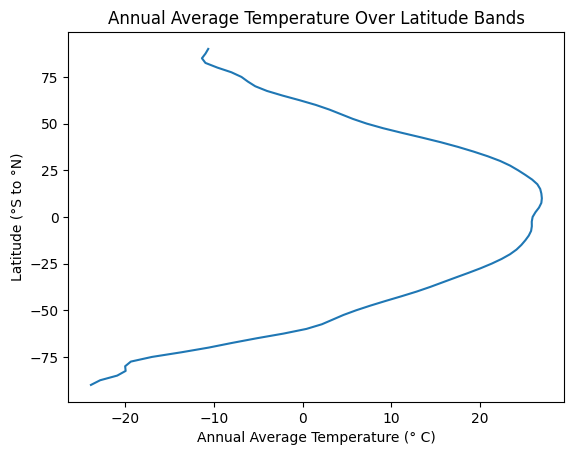

In [24]:
fig,ax =plt.subplots()
ax.plot(avg_lats,lat)
ax.set_xlabel('Annual Average Temperature (\u00b0 C)')
ax.set_ylabel('Latitude (\u00b0S to \u00b0N)')
ax.set_title('Annual Average Temperature Over Latitude Bands')

# YOUR TURN: Interpret the line plot

In [ ]:
# 
# 

# YOUR TURN


## Find the *range* in average monthly surface temperatures for 2022 *at each location*
## (1) Find the maximum average monthly surface temperature, over all months
## (2) Find the minimum average monthly surface temperature, over all months
## (3) Take the difference

In [32]:
max_temp = np.max(temperature[:,0,:,:], axis=0)

min_temp = np.min(temperature[:,0,:,:], axis=0)

range_temp = max_temp - min_temp

print(max_temp, min_temp, range_temp)

[[ 2.1875  2.1875  2.1875 ...  2.1875  2.1875  2.1875]
 [ 1.6875  1.6875  1.6875 ...  1.6875  1.6875  1.6875]
 [ 1.625   1.625   1.6875 ...  1.6875  1.6875  1.625 ]
 ...
 [-1.25   -1.25   -1.1875 ... -1.3125 -1.3125 -1.25  ]
 [-2.8125 -2.8125 -2.8125 ... -2.8125 -2.8125 -2.8125]
 [-2.5625 -2.5625 -2.5625 ... -2.5625 -2.5625 -2.5625]] [[-20.6875 -20.6875 -20.6875 ... -20.6875 -20.6875 -20.6875]
 [-23.     -23.     -23.     ... -23.0625 -23.0625 -23.    ]
 [-23.1875 -22.9375 -22.625  ... -24.125  -23.8125 -23.5   ]
 ...
 [-38.     -38.4375 -38.875  ... -36.4375 -37.     -37.5   ]
 [-38.25   -38.5    -38.6875 ... -37.5625 -37.8125 -38.0625]
 [-36.5    -36.5    -36.5    ... -36.5    -36.5    -36.5   ]] [[22.875  22.875  22.875  ... 22.875  22.875  22.875 ]
 [24.6875 24.6875 24.6875 ... 24.75   24.75   24.6875]
 [24.8125 24.5625 24.3125 ... 25.8125 25.5    25.125 ]
 ...
 [36.75   37.1875 37.6875 ... 35.125  35.6875 36.25  ]
 [35.4375 35.6875 35.875  ... 34.75   35.     35.25  ]
 [33.9375 33

# MY TURN - I PLOT FOR YOU

Text(0.5, 1.0, 'Range in Average Monthly Surface Temperatures')

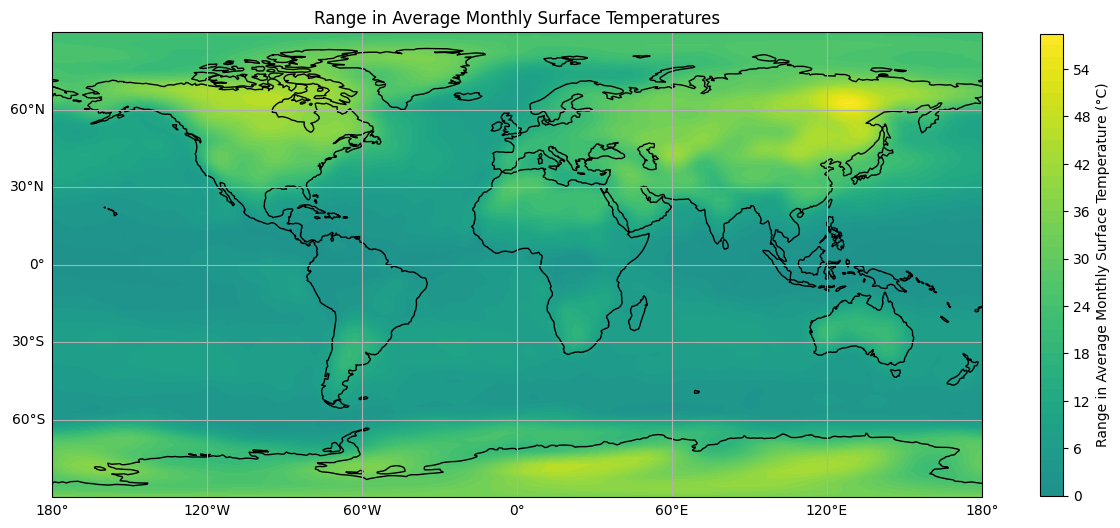

In [33]:
# !! Now
# I create the map for you!
# !!!

lon = data['lon'].values

import cartopy.crs as ccrs # for projection
import cartopy.feature as cfeature # for map features 
from cartopy.util import add_cyclic_point

# Same colormap as previous lesson on 2D plotting
cmap=plt.get_cmap('viridis')

range_temp, lon = add_cyclic_point(range_temp, coord=lon)

# Create your meshgrid using lon and lat
X, Y = np.meshgrid(lon, lat)

# A common projection to use 
proj=ccrs.PlateCarree()

#Create a figure with an axes object on which we will plot. Pass the projection to that axes.
fig, ax = plt.subplots(figsize=(15,15),subplot_kw=dict(projection=proj))

cs = ax.contourf(X,Y, range_temp,cmap=cmap,levels = 52,norm = mcolors.TwoSlopeNorm(0))
cb=fig.colorbar(cs,shrink=0.4)
            
# Some options involving the gridlines
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# Add coastlines!
ax.coastlines()

cb.set_label("Range in Average Monthly Surface Temperature (\u00b0C)")
ax.set_title('Range in Average Monthly Surface Temperatures')

# YOUR TURN, ONLY IF TIME PERMITS

In [28]:
# How many locations each month exceed 90 deg F average monthly surface temperature?
hot_months = np.sum(temperature[:,0,:,:]>thresh, axis=(1,2))
print(hot_months)

# Sanity check: [45 42 99 171 230 313 351 306 236 91 17 33]

[ 45  42  99 171 230 313 351 306 236  91  17  33]


# MY TURN - I PLOT FOR YOU

Text(0.5, 0, 'Month in 2022')

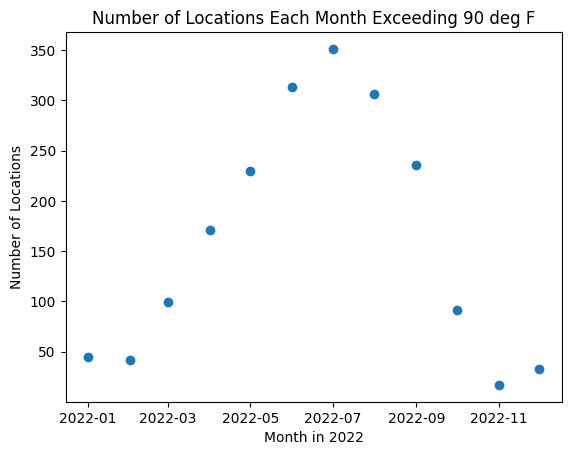

In [29]:
# Plotting your 
fig,ax = plt.subplots()
ax.scatter(time, hot_months)
ax.set_title('Number of Locations Each Month Exceeding 90 deg F')
ax.set_ylabel('Number of Locations')
ax.set_xlabel('Month in 2022')